# Importing Necessary Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data collection and analysis

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Using K-Means 

In [7]:
#Selection only necessary features
X = data.iloc[:, 3:5].values

In [8]:
#Finding best cluster with WCSS
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

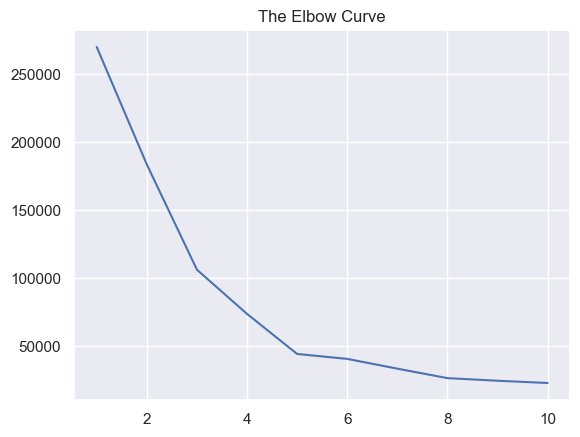

In [9]:
#Plotting Elbow Curve For WCSS values
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Curve")
plt.show()

In [10]:
#Fitting Data to our model with optimum cluster value
km = KMeans(n_clusters=5)

y = km.fit_predict(X)

In [11]:
y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 4, 4,
       4, 4])

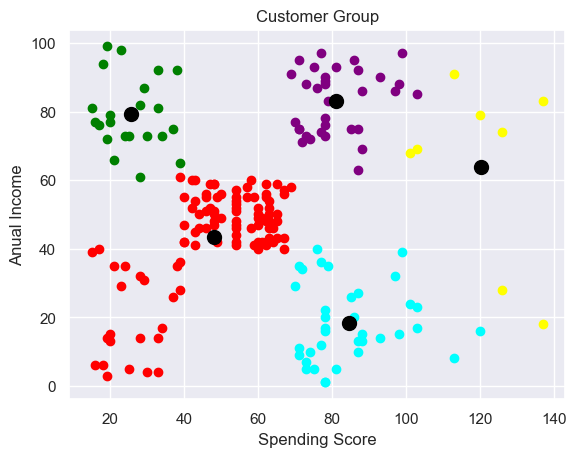

In [12]:
#Plotting the clusters point in graph
# plt.figure(figsize=(8,5))
plt.scatter(X[y == 0,0], X[y == 0,1], color='red', label='Cluster1')
plt.scatter(X[y == 1,0], X[y == 1,1], color='purple', label='Cluster2')
plt.scatter(X[y == 2,0], X[y == 2,1], color='cyan', label='Cluster3')
plt.scatter(X[y == 3,0], X[y == 3,1], color='green', label='Cluster4')
plt.scatter(X[y == 4,0], X[y == 4,1], color='yellow', label='Cluster5')

# plotting Centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, color='black')

plt.title('Customer Group')
plt.xlabel('Spending Score')
plt.ylabel('Anual Income')
# plt.legend()
plt.show()

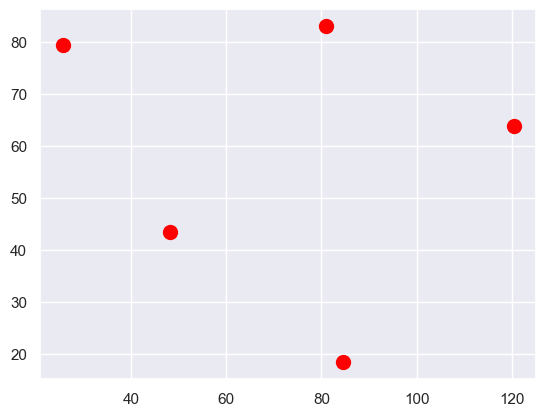

In [13]:
# plotting Centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, color='red')

# Using Agglomerative 

In [15]:
import scipy.cluster.hierarchy as shc

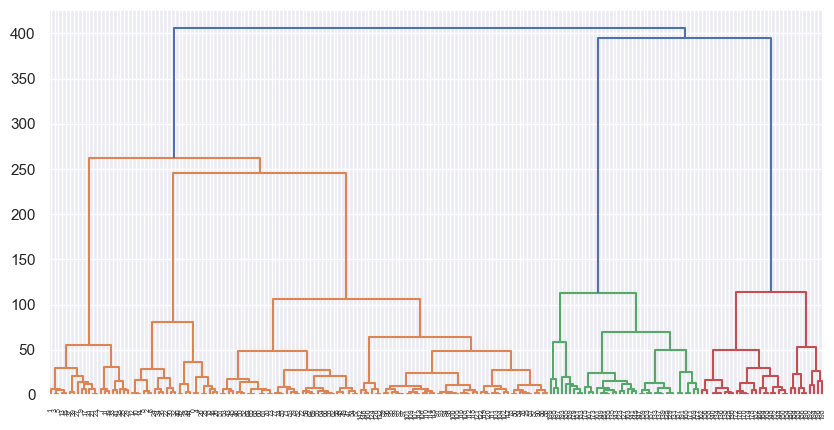

In [29]:
#Plotting Dendogram
plt.figure(figsize=(10,5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

In [20]:
y = cluster.fit_predict(X)

# Using DBSCAN

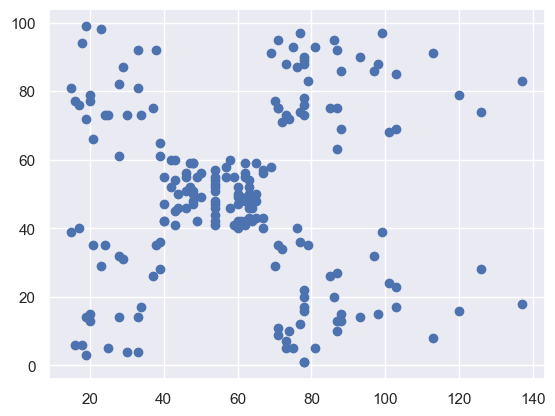

In [22]:
plt.scatter(X[:, 0], X[:, 1])

In [21]:
from sklearn.cluster import DBSCAN

In [27]:
db = DBSCAN(eps=5, min_samples=5)
db.fit(X)

DBSCAN(eps=5)

In [28]:
db.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)